# Basic Data Processing with Pandas - Part 2

In this tutorial, we will continue to explore the basics of data processing with Pandas. We will keep working on the IMDB dataset.

This time, we will answer more complex questions and learn more advanced techniques! We will also learn basic data visualization with Pandas.

Some of the questions we will answer today:

- What are the highest rated actors?
- Which director-actor combination generates the highest revenue?
- Do actors whose names start with a J tend to have higher ratings?
- Do movies with the word "love" in the title tend to have higher revenue?

## Getting Started

First, we need to import the Pandas library and load the dataset.

In [2]:
import pandas as pd

movies_df = pd.read_csv("IMDB-Movie-Data.csv", index_col=0)

Let's start by revisiting the last two bonus tasks from the previous tutorial:

- Find how many unique directors are there in the dataset.
- Find out the number of movies released by year in the dataset.

Both of them involved counting values in a column. What Pandas functions are useful for this?

## Counting

There are different levels of counting we can do with Pandas. 

We can count the number of rows in a DataFrame, the number of unique values in a column, the number of times a specific value appears in a column, and even count values within a group.

### Counting Rows

The simplest way to count the number of rows in a DataFrame is to use the `len()` function. This function works on any Python object, not just DataFrames.

We can also use the `shape` attribute of a DataFrame, which returns a tuple with the number of rows and columns in the DataFrame.

`shape` will also be useful in later tutorials, when we will learn how to split and combine DataFrames. It will also be usef a lot with Numpy (tutorial 7).

In [8]:
print(len(movies_df))
print(movies_df.shape)
movies_df

1000
(1000, 11)


,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


### Counting Unique Values

To count the number of unique values in a column, we can use the `nunique()` method.

We can also use the `unique()` method to get a list of all the unique values in a column.

For instance, let's get the number of unique directors:

In [6]:
print(movies_df.Director.nunique())

# And if we want to get the list of unique directors:
print(movies_df.Director.unique()[:5])

644
['James Gunn' 'Ridley Scott' 'M. Night Shyamalan' 'Christophe Lourdelet'
 'David Ayer']


### Counting Specific Values

What if we want to check the number of movies directed by a specific director? We can use the `value_counts()` method.

`value_counts()` counts how many times each value appears in a column. It returns a Series, with the values as the index and the counts as the values.

We can also get the normalized (percentage) value counts with the `normalize` parameter.

In [9]:
# Getting the number of movies directed by each director:
print(movies_df.Director.value_counts()[:5])
# Normalized value counts.
print((movies_df.Director.value_counts(normalize=True)*100)[:5])
# The percentage must add up to 100%. Let's check that:
print((movies_df.Director.value_counts(normalize=True)*100).sum())

Director
Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
Name: count, dtype: int64
Director
Ridley Scott          0.8
David Yates           0.6
M. Night Shyamalan    0.6
Paul W.S. Anderson    0.6
Michael Bay           0.6
Name: proportion, dtype: float64
100.0


What year in our dataset had the most movies released? And the least?

Check the number of movies per year, both in absolute numbers and as a percentage.

In [14]:
# Your code here:
movies_df.Year.value_counts(normalize=True)*100

Year
2016    29.7
2015    12.7
2014     9.8
2013     9.1
2012     6.4
2011     6.3
2010     6.0
2007     5.3
2008     5.2
2009     5.1
2006     4.4
Name: proportion, dtype: float64

How many directors have directed at least 3 movies with a Metascore of 70 or higher?

In [25]:
# Your code here:
x = (movies_df.query("Metascore >= 70").Director.value_counts())
x[x>2]

Director
David Fincher        5
Christopher Nolan    4
Denis Villeneuve     4
Martin Scorsese      4
J.J. Abrams          4
Danny Boyle          3
Ben Affleck          3
David O. Russell     3
Ethan Coen           3
Woody Allen          3
David Yates          3
Steve McQueen        3
Wes Anderson         3
Name: count, dtype: int64

Which directors have directed most movies in different years? Find the top 5.

In [35]:
# Your code here:
movies_df.groupby("Director")["Year"].nunique().sort_values(ascending=False).head()

Director
Ridley Scott          8
Michael Bay           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Martin Scorsese       5
Name: Year, dtype: int64

Let's try something now... Let's get the count of unique actors.

In [36]:
movies_df.Actors.value_counts()

Actors
Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson    2
Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon            2
Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson                   2
Gerard Butler, Aaron Eckhart, Morgan Freeman,Angela Bassett            2
Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana                   1
                                                                      ..
Alexi Pappas, Chase Offerle, Rachel Dratch, Andy Buckley               1
Shailene Woodley, Ansel Elgort, Nat Wolff, Laura Dern                  1
Adam Sandler, Drew Barrymore, Wendi McLendon-Covey, Kevin Nealon       1
Vin Diesel, Paul Walker, Michelle Rodriguez, Jordana Brewster          1
Kevin Spacey, Jennifer Garner, Robbie Amell,Cheryl Hines               1
Name: count, Length: 996, dtype: int64

What happened there?

The `Actors` column actually contains a list of actors in a string, separated by commas. We need to split it!

We will go back to this issue later.

### Counting Values Within Groups

We can also count values within groups. The basic function for this is `count()`.

`count()` counts the number of non-null values in each group. It returns a Series, with the groups as the index and the counts as the values.

We can use the previous methods and apply them to groups (with the `groupby()` method).

For instance, let's count the number of movies per genre.

In [37]:
# Using count():
movies_df.groupby("Genre").Title.count()

Genre
Action                         2
Action,Adventure               3
Action,Adventure,Biography     2
Action,Adventure,Comedy       14
Action,Adventure,Crime         6
                              ..
Romance,Sci-Fi,Thriller        1
Sci-Fi                         2
Sci-Fi,Thriller                1
Thriller                       9
Thriller,War                   1
Name: Title, Length: 207, dtype: int64

Now combine the different count methods to answer the following questions:

- What is the unique number of directors per genre?
- How many movies per genre has each director directed?
- Who is the director with the highest number of movies in different genres?
- And who is the director with the highest number of movies within the **SAME** genre?

In [39]:
movies_df.groupby("Genre").Director.nunique()

Genre
Action                         2
Action,Adventure               3
Action,Adventure,Biography     2
Action,Adventure,Comedy       14
Action,Adventure,Crime         5
                              ..
Romance,Sci-Fi,Thriller        1
Sci-Fi                         2
Sci-Fi,Thriller                1
Thriller                       9
Thriller,War                   1
Name: Director, Length: 207, dtype: int64

In [56]:
movies_df.groupby(["Genre","Director"]).Title.nunique()

Genre             Director            
Action            John Stockwell          1
                  Todor Chapkanov         1
Action,Adventure  Brett Ratner            1
                  Marc Webb               1
                  Sam Raimi               1
                                         ..
Thriller          Michael J. Gallagher    1
                  Nathan Morlando         1
                  Oz Perkins              1
                  Quentin Tarantino       1
Thriller,War      Fabio Guaglione         1
Name: Title, Length: 950, dtype: int64

In [54]:
movies_df.groupby("Director").Genre.nunique().sort_values(ascending=False).head()

Director
Ridley Scott          7
M. Night Shyamalan    6
Paul W.S. Anderson    5
Christopher Nolan     5
Antoine Fuqua         5
Name: Genre, dtype: int64

In [55]:

movies_df.groupby(["Director","Genre"]).Title.nunique().sort_values(ascending=False)

Director        Genre                   
Michael Bay     Action,Adventure,Sci-Fi     4
David Yates     Adventure,Family,Fantasy    4
Justin Lin      Action,Crime,Thriller       4
Lars von Trier  Drama                       3
James Wan       Horror,Mystery,Thriller     3
                                           ..
Greg Berlanti   Comedy,Drama,Romance        1
Greg Kwedar     Thriller                    1
Greg McLean     Action,Horror,Thriller      1
Greg Mottola    Action,Comedy               1
Zackary Adler   Crime,Drama                 1
Name: Title, Length: 950, dtype: int64

## Processing Text

As we saw earlier, the `Actors` column contains a list of actors in a string, separated by commas.

If we want to process this column like we did with `Director`, we need to split the string into a list of actors.

### Splitting Strings

We can do this with the `str.split()` method.

`str` (short for string) is a special attribute of Pandas Series and DataFrames. It contains a lot of useful methods for processing text.

Check out the documentation for more information: https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [1]:
# The str.split() method takes a separator as a parameter. By default, it splits on whitespace. In our case, we want to split on commas.
movies_df.Actors.str.split(", ")

NameError: name 'movies_df' is not defined

So `str.split()` turned the string into a list of strings. But how do we add each actor to the DataFrame?

The easiest option is to add each actor as a new row. (do you see any problems with this approach?)

We can do this with the `explode()` method.

`explode()` takes a column with lists and turns each element of the list into a new row.

In [3]:
# Here we are changing the Actors column to a list of actors. We will learn more about creating and modifying columns in the next tutorial.

movies_df["Actors"] = movies_df.Actors.str.split(",")
# We create a new df with the "exploded" column
movies_df_actors = movies_df.explode("Actors").copy()

In [4]:
movies_df_actors.explode("Actors")

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,Chris Pratt,2014,121,8.1,757074,333.13,76.0
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,Vin Diesel,2014,121,8.1,757074,333.13,76.0
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,Bradley Cooper,2014,121,8.1,757074,333.13,76.0
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,Zoe Saldana,2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,Noomi Rapace,2012,124,7.0,485820,126.46,65.0
...,...,...,...,...,...,...,...,...,...,...,...
999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,Shannon Woodward,2014,93,5.6,4881,NaN,22.0
1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,Kevin Spacey,2016,87,5.3,12435,19.64,11.0
1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,Jennifer Garner,2016,87,5.3,12435,19.64,11.0


Now we have each actor as a separate row. `explode()` copies the other columns for each new row. Now the length of the DataFrame is the sum of the lengths of the lists in the `Actors` column.

Let's check a few things:

- Number of unique actors
- Number of movies per actor
- Number of movies per actor per year

In [7]:
# Your code here:
movies_df_actors.explode("Actors").Actors.nunique()
movies_df_actors.explode("Actors").groupby("Actors").Title.nunique()
movies_df_actors.explode("Actors").groupby(["Actors","Year"]).Title.nunique()


Actors           Year
 50 Cent         2013    1
 A.C. Peterson   2016    1
 AJ Michalka     2011    1
 Aamir Khan      2007    1
 Aaron Burns     2013    1
                        ..
Zachary Quinto   2016    1
Zoey Deutch      2014    1
                 2016    3
Zooey Deschanel  2009    1
                 2016    1
Name: Title, Length: 3665, dtype: int64

### Other `str` Methods

There are many other useful methods in the `str` attribute. Let's have a look at some of the most common ones.

#### `str.contains()`

We can use `str.contains()` to check if a string contains a specific substring.

For instance, let's check how many movies have the word "love" in the title.

In [8]:
# The parameter case=False makes the search case insensitive (i.e. it will find "love" and "Love")
movies_df_actors[movies_df_actors.Title.str.contains("love", case=False)].Title.nunique()

14

#### `str.startswith()` and `str.endswith()`

We can use these methods to check if a string starts or ends with a specific substring.

For instance, let's check how many movies have the word "the" at the beginning of the title.

In [9]:
# str.startswith() doesn't take a case parameter, so we have to convert the strings to lowercase first if we want to do a case insensitive search.
movies_df_actors[movies_df_actors.Title.str.startswith("The")].Title.nunique()

203

#### `str.lower()` and `str.upper()`

We can use these methods to convert a string to lowercase or uppercase.

Let's make all the director names uppercase and check which directors are called STEVEN.

In [ ]:
movies_df_actors[movies_df_actors.Director.str.upper().str.contains("STEVEN")].Director.unique()

Spoiler: we will learn how to create and modify columns in the next tutorial, but here is a preview that will help you in some tasks:

```python
movies_df_actors["is_steven"] = movies_df_actors["Director"].str.upper().str.contains("STEVEN")
```

#### `str.replace()`

We can use this method to replace a substring with another substring.

Let's ruin the title of some movies by replacing "the" with "a random".

In [10]:
movies_df_actors["ruined_title"] = movies_df_actors.Title.str.replace("the", "A Random", case=False)
movies_df_actors.query("Title != ruined_title").ruined_title.sample(5)

Rank
133                                   A Random Shallows
287                    Keeping Up with A Random Joneses
1                          Guardians of A Random Galaxy
108                           A Random Legend of Tarzan
46     Pirates of A Random Caribbean: On Stranger Tides
Name: ruined_title, dtype: object

What if we only want to replace EXACT matches? We can use the regular expressions for that.

Regular expressions are a powerful tool for processing. They are a bit complicated, so we will not go into detail for now. But you can check out the documentation for more information: https://docs.python.org/3/library/re.html

Just as an example, this is how we would ensure that we only replace exact matches of "the":


In [11]:
# The r before the quotes indicates that the string contains a regular expression pattern. \b is a special character that matches the beginning or end of a word.
movies_df_actors["ruined_title"] = movies_df_actors.Title.str.replace(r"\bthe\b", "A Random", case=False, regex="True")
movies_df_actors.query("Title != ruined_title").ruined_title.sample(5)

Rank
437    A Random Longest Ride
940       Up in A Random Air
643    A Random Ridiculous 6
933          A Random Ticket
71          A Random Promise
Name: ruined_title, dtype: object

There are many more methods. Remember to check https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling for more information.


## Aggregating

Now that we have the actors as separete rows, we can aggregate their data to get some interesting insights.

We have already learned the `groupby()` method, which is the basic function for aggregating data. Let's review it:

Let's find out which directors worked with the highest number of different actors.

In [12]:
movies_df_actors.groupby("Director").Actors.nunique().sort_values(ascending=False).head(5)

Director
Ridley Scott          30
M. Night Shyamalan    24
Paul W.S. Anderson    21
Denis Villeneuve      20
Woody Allen           20
Name: Actors, dtype: int64

`groupby()` can also group by multiple columns. Let's find out which directors worked with the highest number of different actors in each year.

In [13]:
movies_df_actors.groupby(["Director", "Year"]).Actors.nunique().sort_values(ascending=False).head(5)

Director          Year
Mike Flanagan     2016    12
Henry Joost       2016     8
Nicholas Stoller  2016     8
Robert Rodriguez  2007     8
David Yates       2016     8
Name: Actors, dtype: int64

### `sum()`

`sum()` sums the values in each group. It can also be used to count the number of non-null (or True) values.

The other basic statistical functions are `mean()`, `median()`, `min()`, `max()`, and `std()`. They all work the same way.

Let's check the mean revenue of each actor.

In [14]:
movies_df_actors.groupby("Actors")["Revenue (Millions)"].mean().sort_values(ascending=False)[:10]

Actors
Daisy Ridley       936.630
 John Boyega       936.630
Judy Greer         652.180
 Alan Tudyk        532.170
 Donnie Yen        532.170
Felicity Jones     532.170
 Kaitlin Olson     486.290
Ellen DeGeneres    486.290
Ed O'Neill         486.290
 Oscar Isaac       481.035
Name: Revenue (Millions), dtype: float64

### `agg()`

`agg()` allows us to apply multiple functions to a column. It returns a DataFrame, with the functions as the columns and the groups as the index. It is like a more flexible version of `groupby()`.

To use it, we need to pass a dictionary to it. The keys of the dictionary are the names of the columns, and the values are the functions to apply.

You can also pass custom functions to `agg()`.

Let's check the min, max, mean and median revenue and rating of each actor.

In [15]:
agg_functions = ["mean", "median", "min", "max"]
movies_df_actors.agg({"Revenue (Millions)": agg_functions, "Rating": agg_functions})

,Revenue (Millions),Rating
mean,82.980052,6.723231
median,48.020000,6.800000
min,0.000000,1.900000
max,936.630000,9.000000


## Data Visualization

Pandas has a built-in visualization system. It is based on Matplotlib, which we will learn about in tutorial 7.

We will learn more about the different types of plots and how to customize them later, but for now, let's just have a quick look at some basic plots.

### Scatter Plots

We can use the `scatter()` method to create a scatter plot.

What is the relationship between the revenue and the rating of the movies? Are highly rated movies more profitable?

<Axes: title={'center': 'Revenue by Rating'}, xlabel='Rating', ylabel='Revenue (Millions)'>

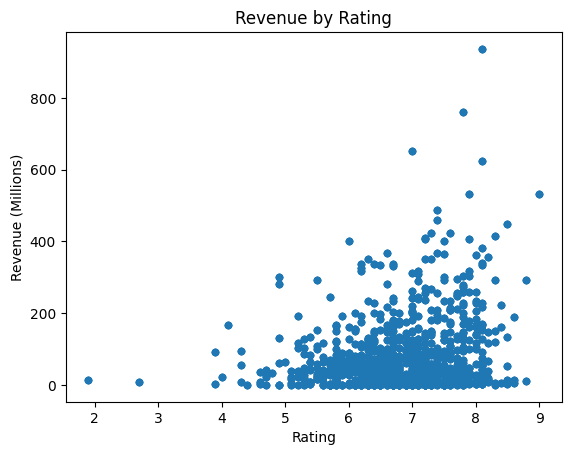

In [16]:
movies_df_actors.plot(kind="scatter", x="Rating", y="Revenue (Millions)", title="Revenue by Rating")

There are some interesting outliers, but the general trend is unclear.

Let's confirm that using correlation. We will learn about more advanced statistical methods in tutorial  7.

In [17]:
movies_df_actors.corrwith(movies_df_actors["Rating"])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

### Line Plots

How does the average Metascore change over time? We can use a line plot to visualize this.

<Axes: title={'center': 'Metascore by Year'}, xlabel='Year'>

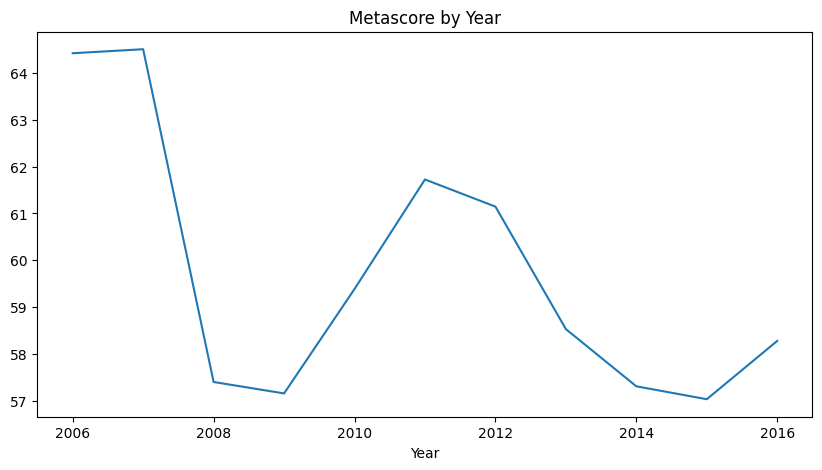

In [18]:
# The figsize parameter is used to set the size of the plot.
movies_df_actors.groupby("Year").Metascore.mean().plot(kind="line", title="Metascore by Year", figsize=(10, 5))

### Bar Plots

Let's use a bar plot to visualize the number of movies per year.

<Axes: title={'center': 'Number of Movies per Year'}, xlabel='Year'>

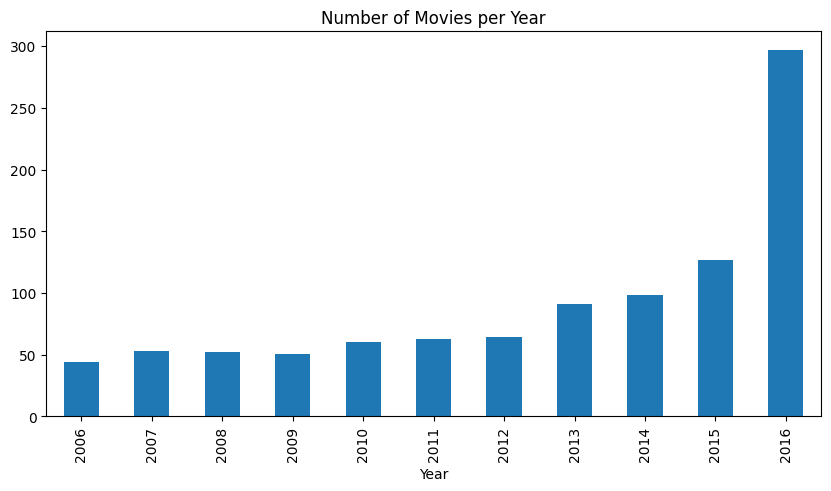

In [19]:
movies_df_actors.groupby("Year").Title.nunique().plot(kind="bar", x="Year", title="Number of Movies per Year", figsize=(10, 5))

### Histograms

We can use a histogram to visualize the distribution of a column.

Let's check the distribution of Ratings.

<Axes: >

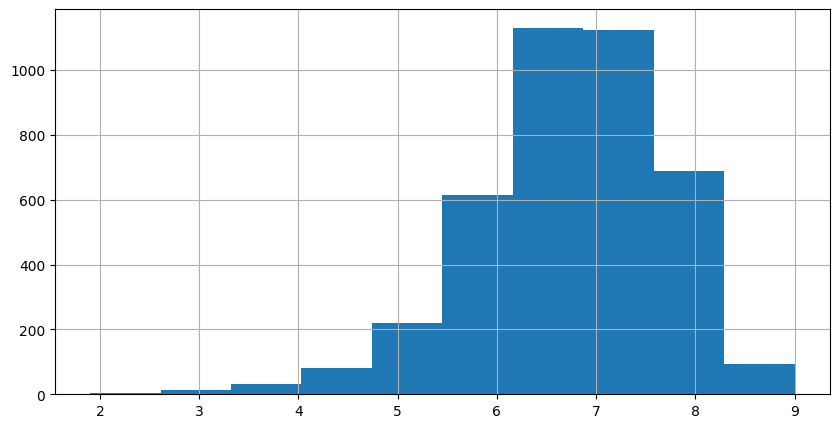

In [20]:
movies_df_actors.Rating.hist(bins=10, figsize=(10, 5))

# Putting It All Together - Tasks

Let's go back to our original questions and practice what we have learned.

- Who are the highest rated actors?
- Which director-actor combination generates the highest revenue?
- Do actors whose names start with a J tend to have higher ratings?
- Do movies with the word "love" in the title tend to have higher revenue?

In [42]:
movies_df_actors.explode("Actors").groupby("Actors")["Rating"].mean().sort_values(ascending=False).head(10)

Actors
Sanya Malhotra         8.8
 Sakshi Tanwar         8.8
 Fatima Sana Shaikh    8.8
 Ryô Narita            8.6
 Omar Sy               8.6
Ryûnosuke Kamiki       8.6
François Cluzet        8.6
 Mackenzie Foy         8.6
 Anne Le Ny            8.6
 Mone Kamishiraishi    8.6
Name: Rating, dtype: float64

In [39]:
movies_df_actors.explode("Actors").groupby(["Director","Actors"])["Revenue (Millions)"].sum().sort_values(ascending=False).head(10)


Director          Actors           
David Yates        Rupert Grint        1269.90
                  Daniel Radcliffe     1269.90
                   Emma Watson         1269.90
Joss Whedon        Chris Evans         1082.27
                  Robert Downey Jr.    1082.27
Michael Bay        Josh Duhamel        1073.20
                  Shia LaBeouf         1073.20
                   Tyrese Gibson       1073.20
Francis Lawrence  Jennifer Lawrence    1043.42
                   Liam Hemsworth      1043.42
Name: Revenue (Millions), dtype: float64

In [ ]:
movies_df_actors.explode("Actors").groupby("Actors")["Rating"].mean().sort_values(ascending=False).head(10)

Bonus tasks:

- Plot a line graph showing the Rating over time comparing two groups: i) Movies by the top 5 directors with the highest revenue ii) Movies by the top 5 directors with the highest number of movies
- Compare the scatter plots of Rating vs Revenue and Metascore vs Revenue. Which one is more useful?
- Create an aggregated DataFrame with the following columns: i) Director ii) Number of movies iii) Average Rating iv) Average Revenue v) Average Metascore. 
- Create an aggregated DataFrame with the following columns: i) Title ii) Number of words in the title iii)  First letter of the title iv) Average number of words in the title of movies starting with this letter  v) Actors vi) Number of actors
- Create a line plot showing the average number of actors per movie over time.
- Create a scatter plot showing the relationship between the number of words in the title and rating.

In [49]:
movies_df_actors.explode("Actors").groupby("Actors")["Rating"].mean().sort_values(ascending=False).head(10)

movies_df[movies_df["Genre"].str.contains("Sci-Fi")]["Revenue (Millions)"].mean()


135.55254545454545